# Introducción a la manipulación de datos con Pandas (Parte I)

## Data Wrangling
Un famoso dicho surgido en los inicios de la computación moderna es "Garbage In, Garbage Out", también conocido por sus iniciales **GIGO**. Esto significa que si los datos de entrada no están correctamente preparados, cualquier procesamiento posterior dará resultados incorrectos. Los datos son habitualmente caóticos, con lo que si los introducimos en nuestros algoritmos y modelos sin más, obtendremos todo tipo de errores y resultados inválidos. Por esto, la limpieza de datos o Data Wrangling es un aspecto fundamental en todo proyecto de Data Science.

Cuando hablamos de **Data Wrangling** en Python, estamos hablando de Pandas. El Data Wrangling, también conocido como **Data Munging** o preprocesamiento y manipulación de datos, es un conjunto de operaciones en el proceso de Data Science que tienen que ver con tomar los datos "crudos" asociados a los problemas del mundo real, organizarlos, "limpiarlos" y convertirlos en un *input* valioso y útil para los algoritmos que se van a usar a continuación en dicho proceso.

Es importante recordar que cuando hacemos práctica de Data Science, es común que  trabajemos con datos ordenados, pero en el mundo real esto no siempre es así. Los datos pueden estar mal organizados, u organizados para otro propósito; pueden estar incompletos; pueden existir valores anómalos que pueden a su vez ser de interés o no. Todas estas situaciones deben ser resueltas con Data Wrangling antes de aplicar cualquier análisis o algoritmo. De lo contrario, podríamos obtener resultados erróneos, o directamente sería imposible obtenerlos.


## Pandas al rescate: estructuras de datos
El proceso de Data Wrangling será cubierto en profundidad más adelante. En esta clase, introducimos la parte práctica de este proceso a través del uso de **Pandas**.

**Pandas** es una librería de uso libre que está construida sobre **NumPy**. Esto quiere decir que toma las estructuras básicas de NumPy y las extiende y mejora añadiendo métodos muy útiles, haciendo de esta forma más fácil la manipulación de datos que son más complejos, de forma totalmente compatible con NumPy.

En particular, **Pandas** define dos tipos de datos, denominados *Series* y *DataFrame*, que proveen una funcionalidad muy eficiente y práctica para manipular datos complejos y de gran volumen. Veamos estas estructuras de datos en profundidad a continuación.

## Series
Un objeto *Series* es, básicamente, un array con índices. Los índices juegan un papel fundamental en la manipulación de datos, como veremos más adelante. Si bien los arrays ya tienen índices, teniendo en cuenta que cualquiera de sus elementos puede ser accedido referenciándolo con el índice entre corchetes, de la forma `objeto[índice]`, los objetos *Series* explotan al máximo esta funcionalidad agregándole vitaminas.
Comencemos definiendo un objeto *Series* y veamos cómo funciona.

In [1]:
%pip install pandas # instalar libreria

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd # importar la libreria pandas

# Serie con 2 valores
# índices por defecto
Numeros = range(50,70,2) # Números pares entre 50 y 70
# Números pares entre 50 y 70 (inclusivo, exclusivo)
Numeros_serie = pd.Series(Numeros) # Creamos un objeto Series
Numeros_serie # El objeto Series

0     50
1     52
2     54
3     56
4     58
5     60
6     62
7     64
8     66
9     68
10    70
dtype: int64

In [3]:
# Valores del objeto
print(Numeros_serie.values)

# Índices del objeto
print(Numeros_serie.index)

[50 52 54 56 58 60 62 64 66 68]
RangeIndex(start=0, stop=10, step=1)


In [4]:
# Serie con 2 valores, índices personalizados
s1 = pd.Series([0.1, 0.2], index=['a','b'])
s1

a    0.1
b    0.2
dtype: float64

In [5]:
# índices por defecto
pd.Series([0.1, 0.2])

0    0.1
1    0.2
dtype: float64

In [6]:
# Acceso de forma tradicional, como en NumPy
Numeros_serie[9]

68

In [7]:
# -1: último elemento
Numeros_serie.iloc[-1]

68

In [8]:
# -2: penúltimo elemento
Numeros_serie.iloc[-2]

66

Entonces, ¿no es esto un objeto *NumPy*?. Casi. La diferencia está en los índices. Al definirse de manera explícita incorporan más flexibilidad que termina siendo muy útil a la hora de llevar a cabo operaciones muy comunes con los datos.

Para empezar, los índices son de un solo tipo y no pueden cambiarse, pero sí pueden definirse como queramos.
Supongamos que queremos utilizar texto en vez de números:


In [9]:
# Crea tu propia Serie con los siguientes valores como índice
# Array de índices personalizados
Numeros_en_texto = ['primero','segundo','tercero','cuarto','quinto','sexto','séptimo','octavo','noveno','décimo']

s2 = pd.Series(range(1,11), index=Numeros_en_texto)
s2

primero     1
segundo     2
tercero     3
cuarto      4
quinto      5
sexto       6
séptimo     7
octavo      8
noveno      9
décimo     10
dtype: int64

In [10]:
# También podemos usar range como índice
pd.Series(range(1,11), index=range(21,31))

21     1
22     2
23     3
24     4
25     5
26     6
27     7
28     8
29     9
30    10
dtype: int64

Recordemos que tanto los valores como los índices son de un sólo tipo de dato, cada uno por su lado, que queda fijo en la creación del objeto. Esto mantiene la eficiencia de los objetos en Python: al ser las estructuras de un solo tipo, las operaciones para cada elemento son las mismas, y en consecuencia el tiempo de procesamiento es menor.

## DataFrame
Un *DataFrame* es una extensión del objeto Series para trabajar en dos dimensiones. Puede pensarse como una sucesión de objetos Series del mismo tamaño, y que comparten los mismos índices. Un esquema de un DataFrame sería el siguiente:
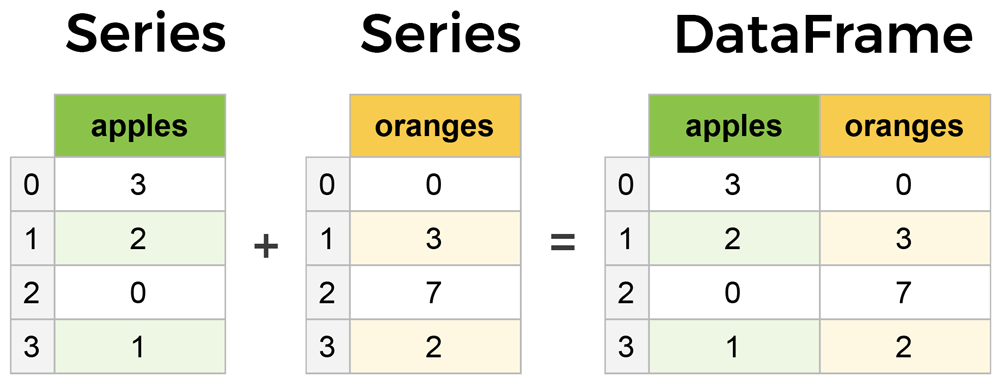
Veamos un ejemplo:

In [11]:
# Listas con valores de apples y oranges
apples = [3, 2, 0, 1]
oranges = [0, 3, 7, 2]

# Construir objetos Series
series_apples = pd.Series(apples)
series_oranges = pd.Series(oranges)

df = pd.DataFrame({'apples':series_apples,
                   'oranges':series_oranges})
df

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [12]:
# Otra opción utilizando directamente las listas (no Series)
df2 = pd.DataFrame({'apples':apples,'oranges':oranges})
df2

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


Veamos ahora otro ejemplo especificando los índices según modelos de autos.

In [13]:
modelos = ['A4 3.0 Quattro 4dr manual',
 'A4 3.0 Quattro 4dr auto',
 'A6 3.0 4dr',
 'A6 3.0 Quattro 4dr',
 'A4 3.0 convertible 2dr']
peso = [3583, 3627, 3561, 3880, 3814]
precios = ['$33,430', '$34,480', '$36,640', '$39,640', '$42,490']
print(modelos,'\n',peso,'\n',precios)

['A4 3.0 Quattro 4dr manual', 'A4 3.0 Quattro 4dr auto', 'A6 3.0 4dr', 'A6 3.0 Quattro 4dr', 'A4 3.0 convertible 2dr'] 
 [3583, 3627, 3561, 3880, 3814] 
 ['$33,430', '$34,480', '$36,640', '$39,640', '$42,490']


In [14]:
# Construimos un objeto Series con los modelos y sus pesos
Autos_peso = pd.Series(peso, index=modelos)
# Construimos un objeto Series con los modelos y sus precios
Autos_precio = pd.Series(precios, index=modelos)

print(Autos_peso)
print('\n')
print(Autos_precio)
# Los índices son los mismos? SI

A4 3.0 Quattro 4dr manual    3583
A4 3.0 Quattro 4dr auto      3627
A6 3.0 4dr                   3561
A6 3.0 Quattro 4dr           3880
A4 3.0 convertible 2dr       3814
dtype: int64


A4 3.0 Quattro 4dr manual    $33,430
A4 3.0 Quattro 4dr auto      $34,480
A6 3.0 4dr                   $36,640
A6 3.0 Quattro 4dr           $39,640
A4 3.0 convertible 2dr       $42,490
dtype: object


In [15]:
# Integramos todo en un Dataframe
# Constructor usando diccionarios: {key1 -> value1 , key2 -> value2}
# La llave será el nombre de la columna en el DataFrame
Autos = pd.DataFrame({'Peso':Autos_peso,'Precio':Autos_precio})
Autos

,Peso,Precio
A4 3.0 Quattro 4dr manual,3583,"$33,430"
A4 3.0 Quattro 4dr auto,3627,"$34,480"
A6 3.0 4dr,3561,"$36,640"
A6 3.0 Quattro 4dr,3880,"$39,640"
A4 3.0 convertible 2dr,3814,"$42,490"


Veamos un último ejemplo más avanzado: Ajedrez con un DataFrame

In [16]:
import numpy as np # importar numpy

Ajedrez_64 = np.arange(1,65).reshape(8,8) # reacomoda los 64 valores en 8 filas, 8 columnas
Ajedrez_64

array([[ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16],
       [17, 18, 19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30, 31, 32],
       [33, 34, 35, 36, 37, 38, 39, 40],
       [41, 42, 43, 44, 45, 46, 47, 48],
       [49, 50, 51, 52, 53, 54, 55, 56],
       [57, 58, 59, 60, 61, 62, 63, 64]])

In [17]:
# Tablero con letras como filas y números como columnas
Ajedrez_df = pd.DataFrame(Ajedrez_64,
                          columns=range(1, 9),
                          index=['A','B','C','D','E','F','G','H'])
Ajedrez_df

,1,2,3,4,5,6,7,8
A,1,2,3,4,5,6,7,8
B,9,10,11,12,13,14,15,16
C,17,18,19,20,21,22,23,24
D,25,26,27,28,29,30,31,32
E,33,34,35,36,37,38,39,40
F,41,42,43,44,45,46,47,48
G,49,50,51,52,53,54,55,56
H,57,58,59,60,61,62,63,64


### Selección de elementos

Una vez creados estos objetos, veamos la mejor forma de trabajar con ellos. Una primera toma de contacto es el acceso a los elementos. Veamos cómo hacer esto con los ejemplos anteriores. A continuación veremos ejemplos con el tipo **Series**

In [18]:
# Modificamos el indice
Numeros_serie.index = Numeros_en_texto
print(Numeros_serie)

# Accedo al elemento referenciando su índice
print(Numeros_serie['quinto']) # nos dió KeyError la primera vez

# Estilo pandas, accediendo al quinto elemento. Equivalente al anterior, por claridad recomendamos usar este cuando trabajamos con Pandas
print(Numeros_serie.loc['quinto'])

# Estilo de acceso tradicional, selecciona el quinto elemento. Si los índices son numéricos, iloc y loc ayudan a entender el tipo de referencia
print(Numeros_serie.iloc[4])

primero    50
segundo    52
tercero    54
cuarto     56
quinto     58
sexto      60
séptimo    62
octavo     64
noveno     66
décimo     68
dtype: int64
58
58
58


In [19]:
# ¿Hay un objeto con el índice 'quinto'?
if 'milésimo' in Numeros_serie:
  print('Si está!\n es ', Numeros_serie['milésimo'])

In [20]:
# Modificar un elemento referenciándolo por su índice
Numeros_serie['quinto'] = 0
Numeros_serie

primero    50
segundo    52
tercero    54
cuarto     56
quinto      0
sexto      60
séptimo    62
octavo     64
noveno     66
décimo     68
dtype: int64

Selección de elementos con un criterio

In [21]:
# Muestrame todos aquellos valores mayor o igual a 60
Numeros_serie[Numeros_serie >= 60]

sexto      60
séptimo    62
octavo     64
noveno     66
décimo     68
dtype: int64

Con *DataFrame*, extendemos estas formas de acceso al considerar filas (índices) y columnas.

In [22]:
# Índices: se usan para filas
Autos.index

Index(['A4 3.0 Quattro 4dr manual', 'A4 3.0 Quattro 4dr auto', 'A6 3.0 4dr',
       'A6 3.0 Quattro 4dr', 'A4 3.0 convertible 2dr'],
      dtype='object')

In [23]:
# Columnas del DataFrame
Autos.columns

Index(['Peso', 'Precio'], dtype='object')

In [24]:
# Todos los datos
Autos.values

array([[3583, '$33,430'],
       [3627, '$34,480'],
       [3561, '$36,640'],
       [3880, '$39,640'],
       [3814, '$42,490']], dtype=object)

In [25]:
# Selecciono la columna "Peso"
Autos['Peso']

A4 3.0 Quattro 4dr manual    3583
A4 3.0 Quattro 4dr auto      3627
A6 3.0 4dr                   3561
A6 3.0 Quattro 4dr           3880
A4 3.0 convertible 2dr       3814
Name: Peso, dtype: int64

In [26]:
# Selecciono la segunda fila (datos "crudos")
Autos.values[1]

array([3627, '$34,480'], dtype=object)

In [27]:
Autos.loc['A4 3.0 Quattro 4dr auto'] # Equivalente al anterior, pero lo devuelve como una Serie

Peso         3627
Precio    $34,480
Name: A4 3.0 Quattro 4dr auto, dtype: object

In [28]:
# Selección más compleja:
# quiero aquellos registros que cumplen X condición, dame sus valores en Y columna
Autos.loc[Autos_peso < 3600, # condicion
          'Precio']

A4 3.0 Quattro 4dr manual    $33,430
A6 3.0 4dr                   $36,640
Name: Precio, dtype: object

In [29]:
# Selección más compleja:
# quiero aquellos registros que cumplen X condición, dame 2 columnas
Autos.loc[Autos_peso < 3600, # condicion
          ['Precio','Peso']]

,Precio,Peso
A4 3.0 Quattro 4dr manual,"$33,430",3583
A6 3.0 4dr,"$36,640",3561


In [30]:
Autos.Peso.mean()

3693.0

## Operaciones con datos

### Transposición
La transposición consiste en intercambiar las filas de un *DataFrame* por sus columnas. Esta operación no realiza ninguna modificación sobre los datos, sino que es meramente un cambio visual. La transposición es útil ya que en ocasiones puede resultar más cómodo trabajar con el Data Frame transpuesto en lugar del original.

In [31]:
Autos

,Peso,Precio
A4 3.0 Quattro 4dr manual,3583,"$33,430"
A4 3.0 Quattro 4dr auto,3627,"$34,480"
A6 3.0 4dr,3561,"$36,640"
A6 3.0 Quattro 4dr,3880,"$39,640"
A4 3.0 convertible 2dr,3814,"$42,490"


In [32]:
Autos.T

,A4 3.0 Quattro 4dr manual,A4 3.0 Quattro 4dr auto,A6 3.0 4dr,A6 3.0 Quattro 4dr,A4 3.0 convertible 2dr
Peso,3583,3627,3561,3880,3814
Precio,"$33,430","$34,480","$36,640","$39,640","$42,490"


In [33]:
# Veamos utilidad con "describe"
Autos.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Peso,5.0,NaN,NaN,NaN,3693.0,144.473181,3561.0,3583.0,3627.0,3814.0,3880.0
Precio,5,5,"$33,430",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# No se modificó el DF
Autos

,Peso,Precio
A4 3.0 Quattro 4dr manual,3583,"$33,430"
A4 3.0 Quattro 4dr auto,3627,"$34,480"
A6 3.0 4dr,3561,"$36,640"
A6 3.0 Quattro 4dr,3880,"$39,640"
A4 3.0 convertible 2dr,3814,"$42,490"


### Funciones vectorizadas
Las **funciones vectorizadas** o `ufuncs` (*universal functions*), permiten aplicar operaciones a *Series* o *DataFrames* completos sin necesidad de utilizar bucles explícitos. Esto se logra aprovechando las capacidades de *NumPy*, que es la biblioteca subyacente en la que se basa *Pandas*.


**Ventajas**
1. Rendimiento: Las operaciones vectorizadas son mucho más rápidas que los bucles tradicionales en *Python* porque están optimizadas en *C* y utilizan operaciones "en bloque".

2. Código más limpio: Al evitar bucles, el código es más conciso y fácil de leer.

3. Menos errores: Al trabajar con operaciones en masa, se reduce la posibilidad de errores que pueden ocurrir en bucles.

**Ejemplos**:

In [35]:
# Operaciones aritméticas
s = pd.Series([1, 2, 3, 4])
print(s)

# Sumar 10 a cada elemento
s = s + 10
print(s)

0    1
1    2
2    3
3    4
dtype: int64
0    11
1    12
2    13
3    14
dtype: int64


In [36]:
# Funciones matemáticas
s = pd.Series([1, 4, 9, 16])
print(s)

sqrt_s = np.sqrt(s) # esta función vectorizada no requiere que recorramos toda la lista
print(sqrt_s)

0     1
1     4
2     9
3    16
dtype: int64
0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64


In [37]:
# Funciones condicionales
s = pd.Series([1, 2, 3, 4])
resultado = np.where(s > 2, 'Mayor que 2', 'Menor que 2')
print(resultado)

['Menor que 2' 'Menor que 2' 'Mayor que 2' 'Mayor que 2']


En el siguiente bloque de código se calcula un nuevo *DataFrame*, el cual es resultado de realizar un cálculo sobre una determinada fila.

In [38]:
largo = [179, 179, 192, 192, 180]
# Crear dataframe a partir de peso y largo de autos
Autos_2 = pd.DataFrame({'Peso': peso,'Largo': largo}, index=modelos)
Autos_2

,Peso,Largo
A4 3.0 Quattro 4dr manual,3583,179
A4 3.0 Quattro 4dr auto,3627,179
A6 3.0 4dr,3561,192
A6 3.0 Quattro 4dr,3880,192
A4 3.0 convertible 2dr,3814,180


In [39]:
# Cuánto mide y cuánto pesa cada auto en porcentaje con respecto al primero
print(Autos_2 / Autos_2.iloc[0] * 100) # ufunc o Funcion vectorizada

                                 Peso       Largo
A4 3.0 Quattro 4dr manual  100.000000  100.000000
A4 3.0 Quattro 4dr auto    101.228021  100.000000
A6 3.0 4dr                  99.385989  107.262570
A6 3.0 Quattro 4dr         108.289143  107.262570
A4 3.0 convertible 2dr     106.447111  100.558659


In [40]:
# Cuánto mide y pesa cada auto con respecto al promedio
Autos_2 / Autos_2.mean() * 100

,Peso,Largo
A4 3.0 Quattro 4dr manual,97.021392,97.071584
A4 3.0 Quattro 4dr auto,98.212835,97.071584
A6 3.0 4dr,96.425670,104.121475
A6 3.0 Quattro 4dr,105.063634,104.121475
A4 3.0 convertible 2dr,103.276469,97.613883


In [41]:
Autos_2

,Peso,Largo
A4 3.0 Quattro 4dr manual,3583,179
A4 3.0 Quattro 4dr auto,3627,179
A6 3.0 4dr,3561,192
A6 3.0 Quattro 4dr,3880,192
A4 3.0 convertible 2dr,3814,180


### Conservación de índices
Tengamos en cuenta que los resultados de las operaciones conservan los índices y las columnas, y los índices quedan alineados entre los objetos que participan de la operación. Veremos esto con ejemplos:

In [42]:
Numeros_3 = range(51,70,2) # Números impares entre 50 y 70

# Creo un objeto Series con el mismo índice que el anterior, que contenía los números pares
Numeros_serie_3 = pd.Series(Numeros_3, index=Numeros_en_texto)
Numeros_serie_3

primero    51
segundo    53
tercero    55
cuarto     57
quinto     59
sexto      61
séptimo    63
octavo     65
noveno     67
décimo     69
dtype: int64

In [43]:
# Creo un objeto Series con el mismo índice que el anterior, que contenía los números pares
Numeros_serie_2 = pd.Series(range(52, 71, 2), index=Numeros_en_texto)
Numeros_serie_2

primero    52
segundo    54
tercero    56
cuarto     58
quinto     60
sexto      62
séptimo    64
octavo     66
noveno     68
décimo     70
dtype: int64

In [44]:
# Sumo ambos objetos, elemento a elemento. Los índices se conservan
print(Numeros_serie_2 + Numeros_serie_3)

# Suma con relleno
print(Numeros_serie_2.add(Numeros_serie_3))

primero    103
segundo    107
tercero    111
cuarto     115
quinto     119
sexto      123
séptimo    127
octavo     131
noveno     135
décimo     139
dtype: int64
primero    103
segundo    107
tercero    111
cuarto     115
quinto     119
sexto      123
séptimo    127
octavo     131
noveno     135
décimo     139
dtype: int64


In [45]:
# Otro ejemplo de conservación de índices
print(Numeros_serie_2 * 1.5)

# Multiplicacion con relleno
print(Numeros_serie_2.mul(1.5))

primero     78.0
segundo     81.0
tercero     84.0
cuarto      87.0
quinto      90.0
sexto       93.0
séptimo     96.0
octavo      99.0
noveno     102.0
décimo     105.0
dtype: float64
primero     78.0
segundo     81.0
tercero     84.0
cuarto      87.0
quinto      90.0
sexto       93.0
séptimo     96.0
octavo      99.0
noveno     102.0
décimo     105.0
dtype: float64


In [46]:
Numeros_serie_2_porcion = Numeros_serie_2[4:7] # Una porción de la serie de números pares
Numeros_serie_3_porcion = Numeros_serie_3[5:8] # Una porción de la serie de números impares
print(Numeros_serie_2_porcion, '\n\n', Numeros_serie_3_porcion, '\n\n')
print(Numeros_serie_2_porcion + Numeros_serie_3_porcion) # Suma de las dos series

quinto     60
sexto      62
séptimo    64
dtype: int64 

 sexto      61
séptimo    63
octavo     65
dtype: int64 


octavo       NaN
quinto       NaN
sexto      123.0
séptimo    127.0
dtype: float64


Observemos lo que sucede en la última línea. ¿Cómo son los dos objetos que se suman?

Notemos que coinciden en dos índices, "sexto" y "séptimo". Estos índices se unen en la suma final. Los índices que no coinciden ("quinto", presente sólo en el primer objeto, y "octavo", presente sólo en el segundo) son rellenados con elementos vacíos, representados por el símbolo `NaN` (*Not a Number*).


Podemos esquematizar la operación anterior de la siguiente forma:
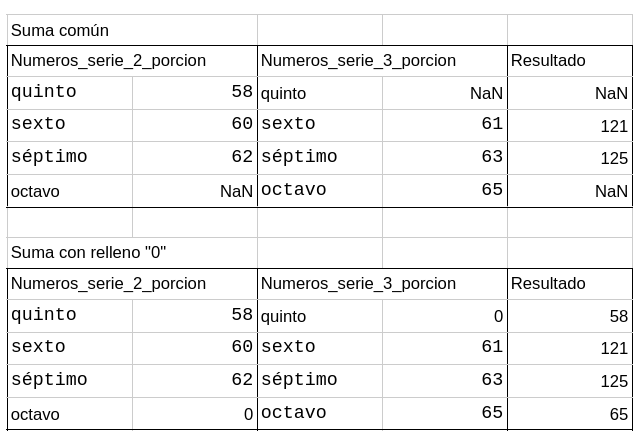


Asimismo, los índices se ordenan automáticamente. En este caso, como es texto, se ordenan alfabéticamente. Si fueran números, se ordenan de menor a mayor.

Ahora veamos cómo **Pandas** maneja los valores ausentes en el siguiente código:


In [47]:
# Rellena NaN con ceros
Numeros_serie_2_porcion.add(Numeros_serie_3_porcion, fill_value=0)

octavo      65.0
quinto      60.0
sexto      123.0
séptimo    127.0
dtype: float64

## Agregar/Borrar columnas
Agregar y borrar columnas en un *DataFrame* de *Pandas* es bastante sencillo. Veamos algunas formas de hacerlo:

In [48]:
columns = ['name', 'age', 'gender', 'job']

user1 = pd.DataFrame([['alice', 19, "F", "student"], ['john', 26, "M", "student"]],
                     columns=columns)
user1

,name,age,gender,job
0,alice,19,F,student
1,john,26,M,student


### Agregar Columnas
1. Agregar una nueva columna con un **valor constante**:

In [49]:
user1['registered'] = True
user1

,name,age,gender,job,registered
0,alice,19,F,student,True
1,john,26,M,student,True


2. Agregar una nueva columna basada en otras columnas:

In [50]:
# Crear DF usando diccionario (dict)
cereales = pd.DataFrame(dict(
    cereal=['Zucaritas', 'Trix', 'Froot Loops', 'Pop Corn'],
    gramos=[700, 900, 850, 600],
    costo=[45.3, 58.6, 54.1, 43.2],
    ganancia=[20, 30, 25, 30]
))
cereales

,cereal,gramos,costo,ganancia
0,Zucaritas,700,45.3,20
1,Trix,900,58.6,30
2,Froot Loops,850,54.1,25
3,Pop Corn,600,43.2,30


In [51]:
cereales['precio venta'] = cereales['costo'] + cereales['ganancia']
cereales

,cereal,gramos,costo,ganancia,precio venta
0,Zucaritas,700,45.3,20,65.3
1,Trix,900,58.6,30,88.6
2,Froot Loops,850,54.1,25,79.1
3,Pop Corn,600,43.2,30,73.2


### Borrar Columnas
1. Borrar una columna usando `drop`:

In [52]:
# asi solo devuelve una copia del DF
# cereales.drop(columns=['precio venta'])

# Si lo asignamos a la misma variable se conservan los cambios
cereales = cereales.drop(columns=['precio venta'])
cereales

,cereal,gramos,costo,ganancia
0,Zucaritas,700,45.3,20
1,Trix,900,58.6,30
2,Froot Loops,850,54.1,25
3,Pop Corn,600,43.2,30


2. Borrar una columna "en su lugar" con `drop` o `del`:

In [53]:
cereales['precio venta'] = cereales['costo'] + cereales['ganancia']
del cereales['precio venta']

In [54]:
# Vuelvo a crear columna para ejemplificar borrado con drop inplace
cereales['precio venta'] = cereales['costo'] + cereales['ganancia']
cereales

,cereal,gramos,costo,ganancia,precio venta
0,Zucaritas,700,45.3,20,65.3
1,Trix,900,58.6,30,88.6
2,Froot Loops,850,54.1,25,79.1
3,Pop Corn,600,43.2,30,73.2


In [55]:
# Vamos a crear 2 columnas
cereales.drop(columns=['precio venta'], inplace=True) # Recommended
# Consideramos un impuesto del 16%
# Y una ganancia de 30%
cereales['ganancia'] = cereales['costo'] * 0.3
cereales['impuesto'] = (cereales['costo'] + cereales['ganancia']) * 0.16

cereales['precio venta'] = cereales['costo'] + cereales['ganancia'] + cereales['impuesto']
cereales

,cereal,gramos,costo,ganancia,impuesto,precio venta
0,Zucaritas,700,45.3,13.59,9.4224,68.3124
1,Trix,900,58.6,17.58,12.1888,88.3688
2,Froot Loops,850,54.1,16.23,11.2528,81.5828
3,Pop Corn,600,43.2,12.96,8.9856,65.1456


# Otras formas de crear Dataframes
1. Directamente usando las *listas* que contienen la información

In [56]:
columns = ['name', 'age', 'gender', 'job']
# Creamos registros fila por fila con listas
user1 = pd.DataFrame([['alice', 19, "F", "student"], ['john', 26, "M", "student"]],
                     columns=columns)
user1

,name,age,gender,job
0,alice,19,F,student
1,john,26,M,student


2. Directamente a partir de un *diccionario*

In [57]:
user2 = pd.DataFrame(dict(name=['peter', 'julie'],
                          age=[33, 44],
                          gender=['M', 'F'],
                          job=['engineer', 'scientist']))
user2

,name,age,gender,job
0,peter,33,M,engineer
1,julie,44,F,scientist


## Examinar Dataframes
Para examinar un DataFrame en pandas, puedes usar varias funciones y métodos que te permiten obtener información sobre su estructura, contenido y estadísticas.

In [58]:
print(df) # show the first 30 and last 30 rows

   apples  oranges
0       3        0
1       2        3
2       0        7
3       1        2


In [59]:
type(df) # DataFrame

pandas.core.frame.DataFrame

In [60]:
df.head() # print the first 5 rows

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [61]:
df.tail() # print the last 5 rows

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [62]:
df.index # "the index" (aka "the labels")

RangeIndex(start=0, stop=4, step=1)

In [63]:
df.columns # column names (which is "an index")

Index(['apples', 'oranges'], dtype='object')

In [64]:
df.dtypes # data types of each column

apples     int64
oranges    int64
dtype: object

In [65]:
df.shape # number of rows and columns

(4, 2)

In [66]:
df.values # underlying numpy array

array([[3, 0],
       [2, 3],
       [0, 7],
       [1, 2]], dtype=int64)

In [67]:
df.info() # concise summary (includes memory usage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   apples   4 non-null      int64
 1   oranges  4 non-null      int64
dtypes: int64(2)
memory usage: 196.0 bytes


## Seleccionando un Data Frame
Para seleccionar datos de un DataFrame en pandas, puedes utilizar diferentes métodos y técnicas.

In [68]:
cereales.costo # punto -> nombre de la columna

0    45.3
1    58.6
2    54.1
3    43.2
Name: costo, dtype: float64

In [69]:
cereales['costo'] # útil cuando el nombre de la columna tiene espacios

0    45.3
1    58.6
2    54.1
3    43.2
Name: costo, dtype: float64

In [70]:
cereales['precio venta']

0    68.3124
1    88.3688
2    81.5828
3    65.1456
Name: precio venta, dtype: float64

In [71]:
# selecciono mas de una columna
cereales[['precio venta', 'costo']] # usar doble corchete

,precio venta,costo
0,68.3124,45.3
1,88.3688,58.6
2,81.5828,54.1
3,65.1456,43.2


In [72]:
columnas_favoritas = ['precio venta', 'costo'] # lista con columnas favoritas
cereales[columnas_favoritas]

,precio venta,costo
0,68.3124,45.3
1,88.3688,58.6
2,81.5828,54.1
3,65.1456,43.2


In [73]:
df

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


Selección de filas con el indexador `iloc`.
Este puede ser usado de forma versatil para seleccionar y escribir filas ó registros específicos.



In [74]:
# Seleccion de filas
df.iloc[0] # first row

apples     3
oranges    0
Name: 0, dtype: int64

In [75]:
# Selección de elementos específicos
df.iloc[0, 0] # fila 0, columna 0

3

In [76]:
# sobreescribo un solo valor
df.iloc[0, 0] = 4
df

,apples,oranges
0,4,0
1,2,3
2,0,7
3,1,2


In [77]:
# sobreescribo la fila 0 usando iloc y una lista
df.iloc[0] = [5, 6]
df

,apples,oranges
0,5,6
1,2,3
2,0,7
3,1,2


In [78]:
# Agregar filas usando loc
df.loc[4] = [9, 12]
df

,apples,oranges
0,5,6
1,2,3
2,0,7
3,1,2
4,9,12


In [79]:
df.shape # 5 filas, 2 columnas

(5, 2)

In [80]:
df.loc[df.shape[0]] = [1,2] # agregar al final sin importar cuál es la última fila
df

,apples,oranges
0,5,6
1,2,3
2,0,7
3,1,2
4,9,12
5,1,2


In [81]:
Autos.loc['Vocho'] = [2000, '$65,000'] # Otro ejemplo
Autos

,Peso,Precio
A4 3.0 Quattro 4dr manual,3583,"$33,430"
A4 3.0 Quattro 4dr auto,3627,"$34,480"
A6 3.0 4dr,3561,"$36,640"
A6 3.0 Quattro 4dr,3880,"$39,640"
A4 3.0 convertible 2dr,3814,"$42,490"
Vocho,2000,"$65,000"


In [82]:
df = pd.DataFrame(dict(name=['wendy', 'john', 'karen', 'rick'],
                       age=[21, 26, 33, 67],
                       gender=['F', 'M', 'F', 'M'],
                       job=['student','engineer', 'scientist', 'engineer']))
df

,name,age,gender,job
0,wendy,21,F,student
1,john,26,M,engineer
2,karen,33,F,scientist
3,rick,67,M,engineer


Selección simple con **condición**

In [83]:
df[df.age < 30]

,name,age,gender,job
0,wendy,21,F,student
1,john,26,M,engineer


Selección con **múltiples condiciones** lógicas.

In [84]:
# Multiple AND conditions
df[(df.age < 30) & (df.gender == 'F')]

,name,age,gender,job
0,wendy,21,F,student


In [85]:
# Multiple OR conditions |
df[(df.job == 'scientist') | (df.gender == 'F')]

,name,age,gender,job
0,wendy,21,F,student
2,karen,33,F,scientist


Podemos hacer esto aun más sofisticado si agregamos al final la lista de columnas a mostrar (entre corchetes), de esta manera, solo vemos las variables deseadas de aquellos registros que cumplen con un criterio.

In [86]:
df[(df.job == 'scientist') | (df.gender == 'F')][['name','age']]

,name,age
0,wendy,21
2,karen,33


Tip: podemos usar "**masks**"  (máscaras), estos son una forma de filtrar filas específicas de un *DataFrame* basadas en criterios definidos (condiciones booleanas). Con esto puedes tener más claro que estas haciendo en tu código al separar las condiciones.

In [87]:
# 1. Crear las máscaras
es_ingeniero = df.job == 'engineer'

# 2. Aplica la máscara
df[es_ingeniero]

,name,age,gender,job
1,john,26,M,engineer
3,rick,67,M,engineer


**Máscaras Combinadas**

Puedes combinar múltiples condiciones usando operadores lógicos (`&` para "AND", `|` para "OR"). Por ejemplo, para seleccionar usuarios que son mayores de 30 años y son científicos:

In [88]:
# Crear máscara
es_senior = df.age > 60

# Combinamos máscaras
df[(es_ingeniero) | (es_senior)]

,name,age,gender,job
1,john,26,M,engineer
3,rick,67,M,engineer


In [89]:
df[(es_ingeniero) | (es_senior)][['name','gender']]

,name,gender
1,john,M
3,rick,M


**Máscaras con** `isin()`

Si quieres filtrar filas donde una columna contiene uno de varios valores, puedes usar `isin()`:

In [90]:
df[(df['job'] == 'engineer') | (df['job'] == 'scientist')]

,name,age,gender,job
1,john,26,M,engineer
2,karen,33,F,scientist
3,rick,67,M,engineer


In [91]:
mask = df['job'].isin(['engineer', 'scientist'])
df[mask]

,name,age,gender,job
1,john,26,M,engineer
2,karen,33,F,scientist
3,rick,67,M,engineer


## Columnas derivadas
Para crear columnas derivadas en un DataFrame de pandas utilizando listas de comprensión, puedes aplicar una lógica específica a los datos existentes.

In [92]:
# Con simple aritmética
df['age_sqr'] = df.age * df.age
df

,name,age,gender,job,age_sqr
0,wendy,21,F,student,441
1,john,26,M,engineer,676
2,karen,33,F,scientist,1089
3,rick,67,M,engineer,4489


Las **listas de comprensión** en *Python* son una forma concisa y eficiente de crear listas a partir de otras listas o iterables. En *pandas*, puedes utilizarlas para manipular y transformar datos en un *DataFrame*.

### Ejemplo 1: Crear una nueva columna basada en condiciones
Supongamos que deseas agregar una columna que clasifique a los usuarios como "Senior" o "Junior" según su edad.

In [93]:
# a: var temporal
df['Status'] = ['Senior' if a >= 60 else 'Junior' for a in df['age']]
df

,name,age,gender,job,age_sqr,Status
0,wendy,21,F,student,441,Junior
1,john,26,M,engineer,676,Junior
2,karen,33,F,scientist,1089,Junior
3,rick,67,M,engineer,4489,Senior


### Ejemplo 2: Crear una columna basada en otra columna
Si quieres crear una columna que indique si el trabajo (engineer o scientist) es técnico o no, podrías hacerlo así:

In [94]:
df['Tecnico'] = ['tecnico' if ocup in ['engineer', 'scientist']
                 else 'no tecnico' for ocup in df['job']]
df

,name,age,gender,job,age_sqr,Status,Tecnico
0,wendy,21,F,student,441,Junior,no tecnico
1,john,26,M,engineer,676,Junior,tecnico
2,karen,33,F,scientist,1089,Junior,tecnico
3,rick,67,M,engineer,4489,Senior,tecnico


### Ejemplo 3: Usar múltiples condiciones
Puedes combinar múltiples condiciones en una lista de comprensión. Por ejemplo, clasificar a los usuarios según su edad y género:

In [95]:
df['Clasificacion'] = [
    'young female' if (age < 30 and gender == 'F') else
    'young male' if (age < 30 and gender == 'M') else
    'senior'
    for age, gender in zip(df['age'], df['gender'])
]
df

,name,age,gender,job,age_sqr,Status,Tecnico,Clasificacion
0,wendy,21,F,student,441,Junior,no tecnico,young female
1,john,26,M,engineer,676,Junior,tecnico,young male
2,karen,33,F,scientist,1089,Junior,tecnico,senior
3,rick,67,M,engineer,4489,Senior,tecnico,senior


In [97]:
# %%shell
# jupyter nbconvert --to html /content/Introducción_a_Pandas.ipynb